In [2]:

pip install yfinance

Processing c:\users\owner\appdata\local\pip\cache\wheels\26\af\8b\fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81\yfinance-0.1.59-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [16]:
#Scrap Stock price data from yahoo finance from Jan 1 2011-Present and output to excel Disney_SP500_StockPrices.xlsx

import yfinance as yf
import pandas as pd

tickers_list = ['DIS','SPY']

data = yf.download(tickers_list,'2011-1-1')['Adj Close']

df = pd.DataFrame(data)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Disney_SP500_StockPrices.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
data.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

print(data.head())

[*********************100%***********************]  2 of 2 completed
                  DIS         SPY
Date                             
2011-01-03  33.302662  103.779396
2011-01-04  34.332928  103.722198
2011-01-05  35.187054  104.261322
2011-01-06  34.914082  104.057114
2011-01-07  34.737968  103.852882


Using the above compiled excel file Disney_SP500_StockPrices.xlsx, I manually narrowed down the dataset to the 1st trading day of each year.  I then created two indexed columns based on Jan 2011 and saved the file as a csv named Annual_Indexed_Disney_SP500_StockPrices.csv

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


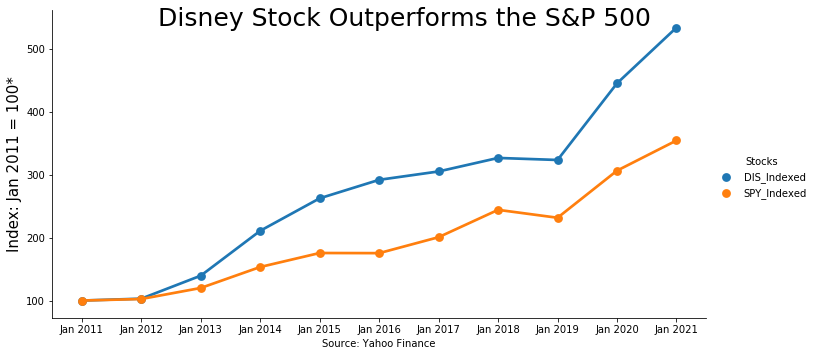

In [44]:
import seaborn as sns

df = pd.read_csv('Annual_Indexed_Disney_SP500_StockPrices.csv')

df = df.melt('Date', var_name='Stocks',  value_name='vals')
g = sns.factorplot(x="Date", y="vals", hue='Stocks', data=df, size=5, aspect=2)

g.fig.suptitle('Disney Stock Outperforms the S&P 500', fontsize= 25)
g.set_ylabels('Index: Jan 2011 = 100*', fontsize= 15)
g.set_xlabels('Source: Yahoo Finance', fontsize= 10)